# Module 17: Practical Application 3
### Assignment for Professional Certificate in ML and AI by UC Berkeley
Goal: Compare the performance of the classifiers (k-nearest neighbors, logistic regression, decision trees, and support vector machines) using a dataset related to the marketing of bank products over the telephone (source: UCI Machine Learning Repository). 

The data is from a Portuguese banking institution and is a collection of the results of multiple marketing campaigns. 

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Import downloaded dataset 
data = pd.read_csv('data/bank-additional-full.csv', sep=";")

# Show basic info about the data
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

## Exploratory Data Analysis

In [3]:
# Replace 'unknown' with NaN to handle missing values appropriately
data.replace('unknown', np.nan, inplace=True)


Missing values:
 age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


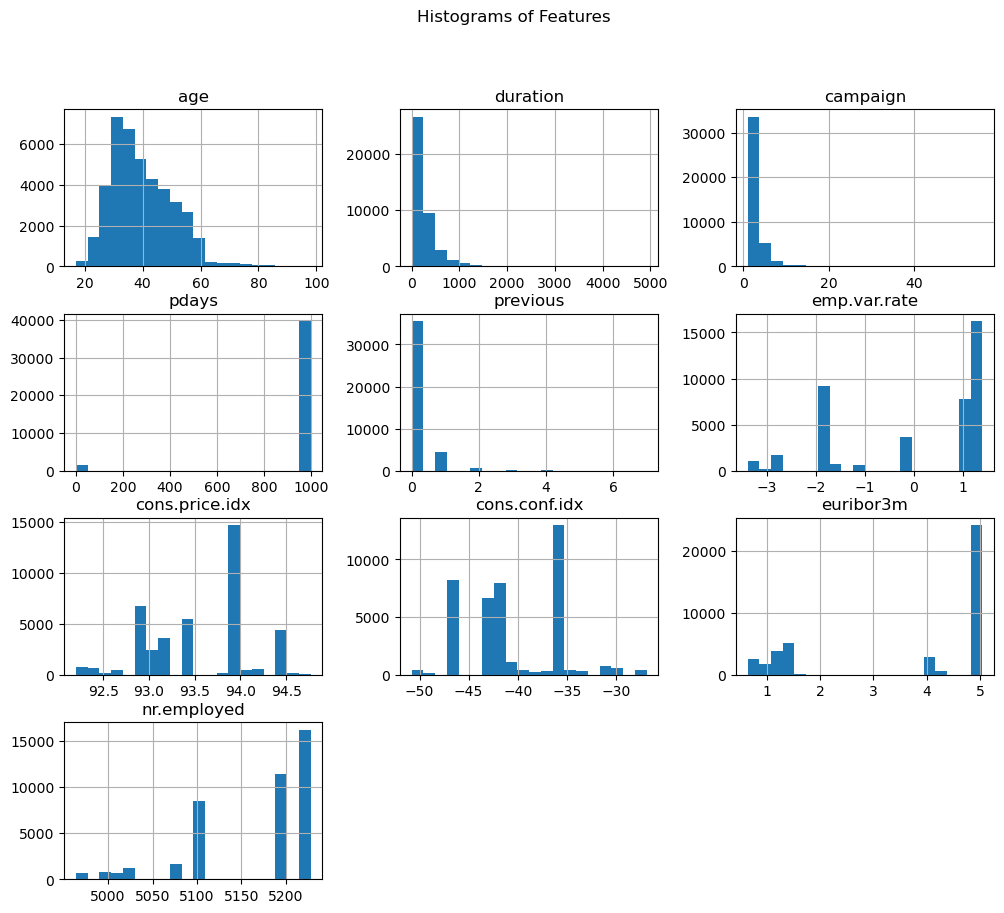

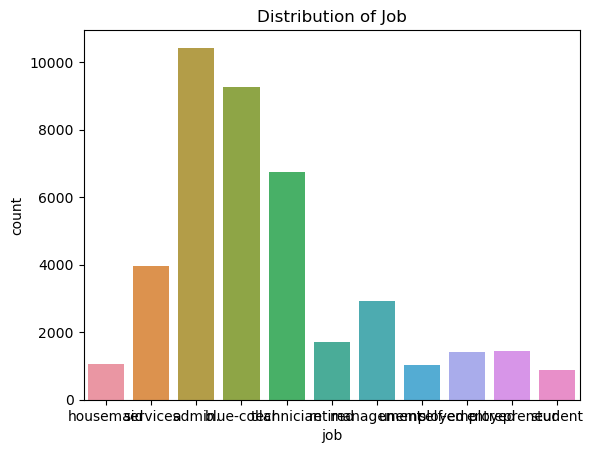

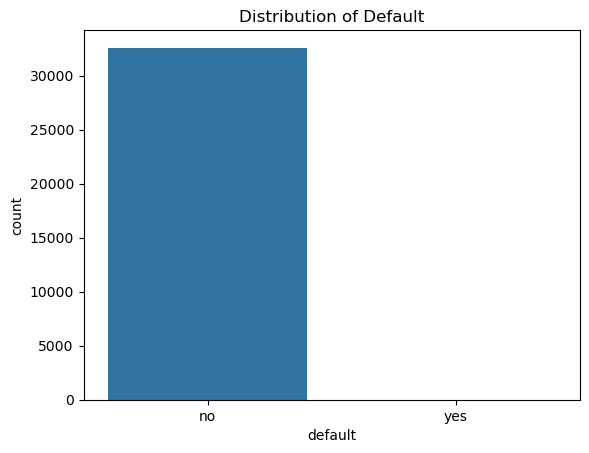

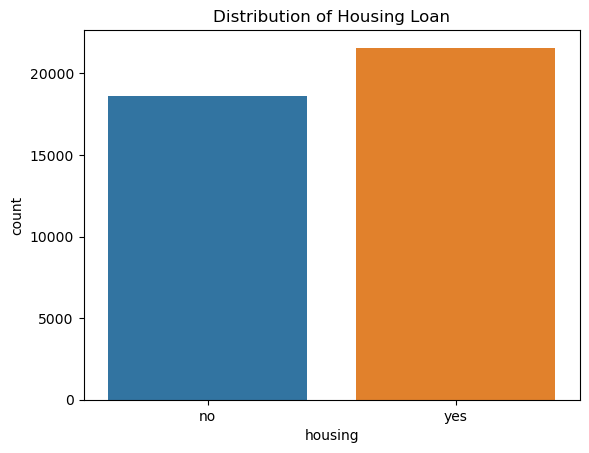

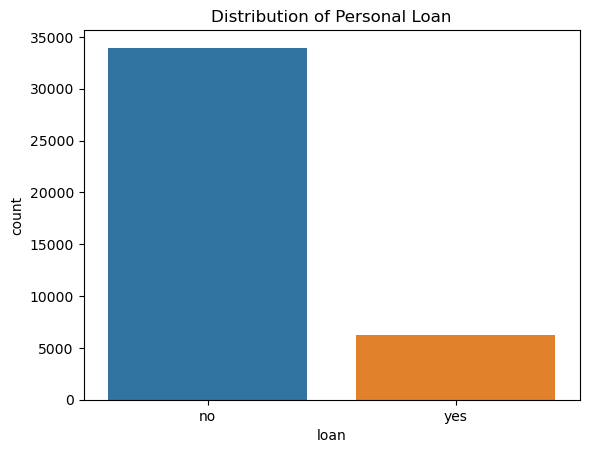

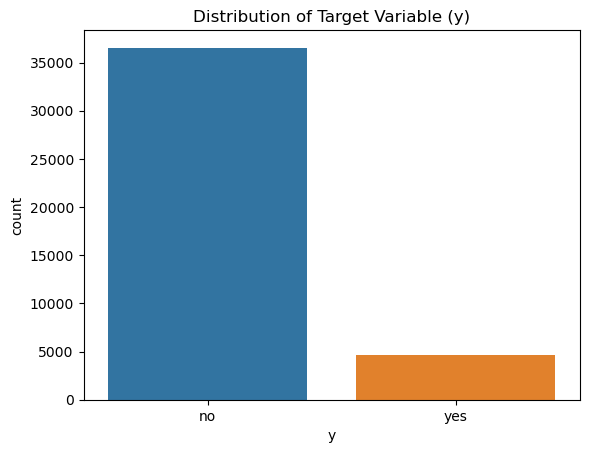

In [4]:
# Exploratory Data Analysis (EDA)

# a. Check for missing values after replacing 'unknown' with NaN
missing_values = data.isnull().sum()
print("\nMissing values:\n", missing_values)

# b. Histograms for target and features
# Plot histograms of numeric features
data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Features")
plt.show()

# Plot distribution of categorical features
sns.countplot(data=data, x='job')
plt.title("Distribution of Job")
plt.show()

sns.countplot(data=data, x='default')
plt.title("Distribution of Default")
plt.show()

sns.countplot(data=data, x='housing')
plt.title("Distribution of Housing Loan")
plt.show()

sns.countplot(data=data, x='loan')
plt.title("Distribution of Personal Loan")
plt.show()

# Plot distribution of the target variable 'y'
sns.countplot(data=data, x='y')
plt.title("Distribution of Target Variable (y)")
plt.show()

In [5]:
# Decision: Delete column default since all values are 'no' (so it is not useful) and replace back NaN with 'unknown'
data.drop(columns=['default'])
data.replace(np.nan, 'unknown', inplace=True)

# Replace 'yes' with 1 and 'no' with 0 in target variable 
data['y'] = data['y'].replace({'yes': 1, 'no': 0})

# Check for missing values after replacing NaN with 'unknown'
# Decision: Treat 'Unknown' itself as a class label.  
missing_values = data.isnull().sum()
print("\nMissing values:\n", missing_values)


Missing values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


## Model development and evaluation

In [6]:
# Handle categorical variables and preprocess data

# Define the target variable and features
X = data.drop(columns=['y'])
y = data['y']

# Define categorical and numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [7]:
# Create a column transformer for preprocessing
# For categorical variables, we will use OneHotEncoder to convert them into numerical format
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with the most frequent value
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
        ]), categorical_features)
    ])

In [8]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Build and evaluate classification models

# Create a list of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(max_depth = 5, random_state=42)#,
    #'SVM': SVC(kernel='linear', random_state=42)
}

# Evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    
    # Create a pipeline that includes preprocessing and model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report and confusion matrix
    print("Classification Report:")
    print(classification_report(y_test, y_pred))


Training Logistic Regression...
Logistic Regression Accuracy: 91.10%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.42      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238


Training K-Nearest Neighbors...
K-Nearest Neighbors Accuracy: 90.20%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      7303
           1       0.59      0.47      0.52       935

    accuracy                           0.90      8238
   macro avg       0.76      0.71      0.73      8238
weighted avg       0.89      0.90      0.90      8238


Training Decision Tree...
Decision Tree Accuracy: 91.51%
Classification Report:
              precision    recall  f1-score   support

           0       0.94 

In [10]:
# GridSearchCV to tune hyperparameters and find the best model

models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

param_grids = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100]
    },
    'K-Nearest Neighbors': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11],
        'classifier__p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
    },
    'Decision Tree': {
        'classifier__max_depth': [5, 10, 15, 20, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__criterion': ['gini', 'entropy']
    },
    'SVM': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear']
    }
}


best_models = {}
for model_name, model in models.items():
    print(f"\nTuning {model_name}...")
    
    # Create a pipeline with preprocessing and the model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Perform GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Store the best model
    best_models[model_name] = grid_search.best_estimator_
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {model_name}: {grid_search.best_score_:.4f}")
    
    # Evaluate the best model on the test set
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test accuracy for {model_name}: {accuracy * 100:.2f}%")
    
    # Classification report and confusion matrix
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    

# 7. Displaying the best model summary
print("\nSummary of Best Models:")
for model_name, best_model in best_models.items():
    print(f"{model_name}: {best_model}")


Tuning Logistic Regression...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Logistic Regression: {'classifier__C': 1}
Best cross-validation score for Logistic Regression: 0.9104
Test accuracy for Logistic Regression: 91.10%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7303
           1       0.67      0.42      0.52       935

    accuracy                           0.91      8238
   macro avg       0.80      0.70      0.74      8238
weighted avg       0.90      0.91      0.90      8238


Tuning K-Nearest Neighbors...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for K-Nearest Neighbors: {'classifier__n_neighbors': 11, 'classifier__p': 1}
Best cross-validation score for K-Nearest Neighbors: 0.9090
Test accuracy for K-Nearest Neighbors: 90.76%
Classification Report:
              precision    recall  f1-score   support

           0       0.9